In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [5]:
x_train = np.array([1.0, 2.0]) # 집크기
y_train = np.array([300.0, 500.0]) # 집값

print(f"집크기데이터: {x_train}")
print(f"집값데이터: {y_train}")
print(f"훈련 예제 개수 : {len(x_train)}")

집크기데이터: [1. 2.]
집값데이터: [300. 500.]
훈련 예제 개수 : 2


In [6]:
def predict(x, w, b):
    return w*x + b

#예시
w = 150
b = 50

for i in range(len(x_train)):
    y_pred = predict(x_train[i], w, b)
    print(f"집 크기 : {x_train[i]*1000} sqft, 예측 값 : {y_pred*1000} 달러 , 실제값: {y_train[i]*1000}달러")

집 크기 : 1000.0 sqft, 예측 값 : 200000.0 달러 , 실제값: 300000.0달러
집 크기 : 2000.0 sqft, 예측 값 : 350000.0 달러 , 실제값: 500000.0달러


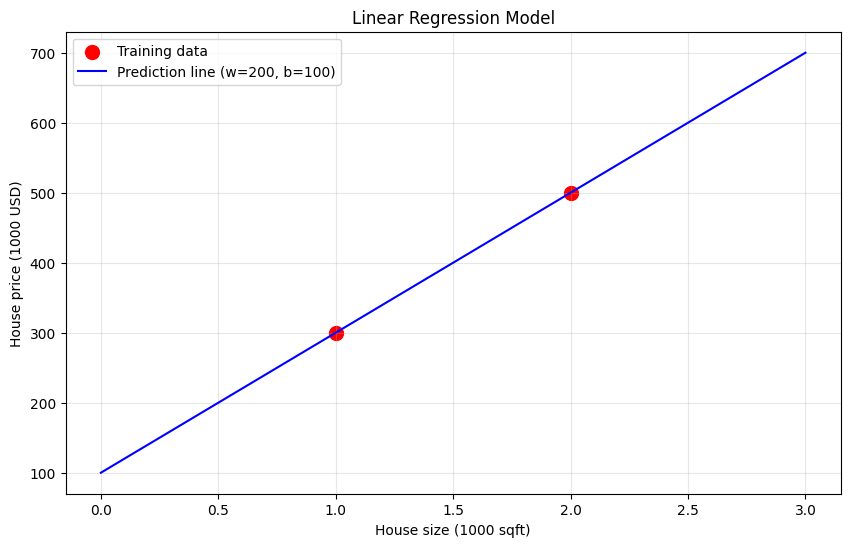

This model is : y = 200x + 100


In [7]:
#데이터 시각화
plt.figure(figsize=(10,6))
w ,b = 200,100

plt.scatter(x_train, y_train, marker='o', c='r' , s=100, label='Training data')

x_range = np.linspace(0,3,100)
y_pred_line = predict(x_range,w,b)
plt.plot(x_range, y_pred_line, color='b', label=f'Prediction line (w={w}, b={b})')

plt.xlabel('House size (1000 sqft)')
plt.ylabel('House price (1000 USD)')
plt.title("Linear Regression Model")
plt.legend()
plt.grid(True, alpha = 0.3)
plt.show()

print(f"This model is : y = {w}x + {b}")

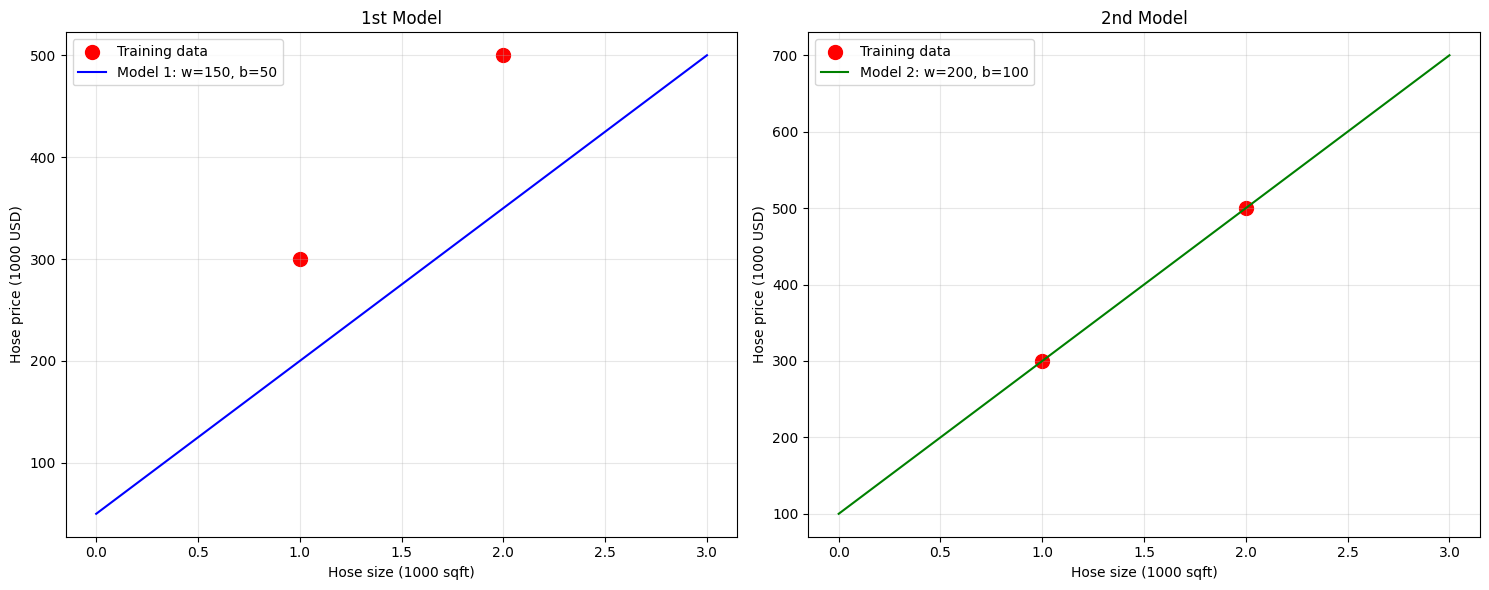

In [9]:
# 방법 1: subplot을 사용하여 두 개의 그래프를 나란히 표시
plt.figure(figsize=(15, 6))

# 첫 번째 그래프 (왼쪽)
plt.subplot(1, 2, 1)  # (행, 열, 인덱스)
w1, b1 = 150, 50
plt.scatter(x_train, y_train, marker='o', c='r', s=100, label='Training data')
x_range = np.linspace(0, 3, 100)
y_pred_line1 = predict(x_range, w1, b1)
plt.plot(x_range, y_pred_line1, color='b', label=f'Model 1: w={w1}, b={b1}')
plt.xlabel('Hose size (1000 sqft)')
plt.ylabel('Hose price (1000 USD)')
plt.title('1st Model')
plt.legend()
plt.grid(True, alpha=0.3)

# 두 번째 그래프 (오른쪽)
plt.subplot(1, 2, 2)
w2, b2 = 200, 100
plt.scatter(x_train, y_train, marker='o', c='r', s=100, label='Training data')
y_pred_line2 = predict(x_range, w2, b2)
plt.plot(x_range, y_pred_line2, color='g', label=f'Model 2: w={w2}, b={b2}')
plt.xlabel('Hose size (1000 sqft)')
plt.ylabel('Hose price (1000 USD)')
plt.title('2nd Model')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()  # 그래프 간격 자동 조정
plt.show()


In [12]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = predict(x[i], w, b)
        dj_dw += (f_wb - y[i]) * x[i]
        dj_db += (f_wb - y[i])

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

#테스트 
w = 200
b = 100
dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)

print(f"w에 대한 기울기 : {dj_dw}")
print(f"b에 대한 기울기 : {dj_db}") # 아, 편미분 값이 0이 되면 minimum에 도달했다는거구나

w에 대한 기울기 : 0.0
b에 대한 기울기 : 0.0


In [13]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0.0

    for i in range(m):
        y_pred = predict(x[i], w, b)
        cost += (y_pred - y[i])**2
    cost = cost / (2*m)

    return cost

In [14]:
from ast import Num


def gradient_descent(x, y, w_init, b_init, alpha, num_iters):
    w = w_init # w는 위에서 선언한 global variable, w_init는 local variable
    b = b_init
    J_history = [] # 기록용

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha* dj_dw
        b = b - alpha* dj_db
        cost = compute_cost(x, y, w, b)
        J_history.append(cost)

        if i % 10 == 0: # 반복 10번마다 로그 출력
            print(f"Iteration {i}: Cost {cost:.2f}, w{w:.2f}, b{b:.2f}")
    return w, b, J_history

#예시 : w = 0, b = 0에서 시작, alpha = 0.1, 100번 반복(10번 출력)
w_init, b_init = 0, 0
alpha = 0.1
num_iters = 100

w_final , b_final , J_history = gradient_descent(x_train, y_train, w_init, b_init, alpha, num_iters)

print(f"최종 w : {w_final}, 최종 b : {b_final}")


Iteration 0: Cost 36731.25, w65.00, b40.00
Iteration 10: Cost 20.84, w188.39, b114.60
Iteration 20: Cost 10.82, w190.92, b114.63
Iteration 30: Cost 9.34, w191.59, b113.61
Iteration 40: Cost 8.07, w192.18, b112.65
Iteration 50: Cost 6.97, w192.73, b111.76
Iteration 60: Cost 6.02, w193.25, b110.93
Iteration 70: Cost 5.20, w193.72, b110.16
Iteration 80: Cost 4.49, w194.17, b109.44
Iteration 90: Cost 3.88, w194.58, b108.77
최종 w : 194.92334898582195, 최종 b : 108.2141938899617


C:\Users\SeungWoo\AppData\Local\Temp\ipykernel_19008\3732464522.py:1: DeprecationWarning: ast.Num is deprecated and will be removed in Python 3.14; use ast.Constant instead
  from ast import Num


1. (1,300) , (2,500)라는 두개의 데이터 점을 잇는 최적의 직선을 찾아야한다. 
2. 완벽한 w값(=기울기)은 **200**, 완벽한 b값(y절편)은 300 - 200 = **100** 이다. 
3. gradient descent를 통해 이론상으로 완벽한 w값,b값을 찾는것이 목표이다. 
4. g-d 함수에 데이터를 넣으면 w,b값이 둘다 0에서 시작하여 계속 업데이트 된다. 
5. cost가 줄어드는것이 보인다. 
6. 100번 반복을 한 결과를 보면, w = 195, b = 108로 꽤나 근접하게 온것을 확인할수있다. 

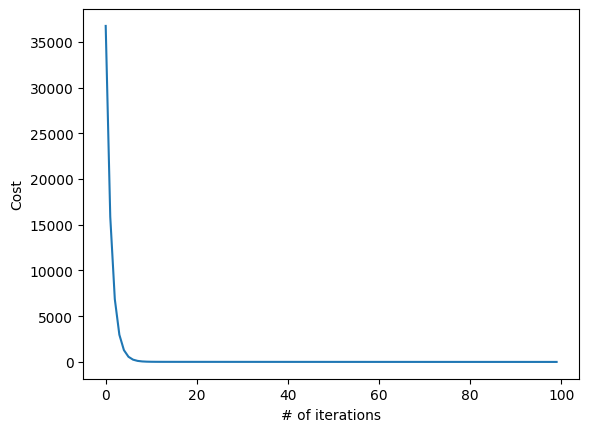

In [ ]:
plt.plot(J_history)
plt.xlabel("# of iterations")
plt.ylabel("Cost")
plt.show() # iteration에 따라 cost가 감소하고 있으니 alpha값이 적합하다. 

In [17]:
# 벡터화의 핵심 : 시그마를 for loop 대신 np.sum으로
def compute_cost_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w*x + b
    cost = np.sum((f_wb -y)**2) / (2*m) # np.sum은 시그마 연산(for loop대신 쓰는건데 한번에 계산해줌)
    return cost

def compute_gradient_vectorized(x, y, w, b):
    m = x.shape[0]
    f_wb = w*x + b
    dj_dw = np.sum((f_wb - y)*x) / m
    dj_db = np.sum(f_wb - y) / m
    return dj_dw, dj_db

# 테스트 : w = 100, b = 50에서 비교
w_test,b_test = 100, 50

#기존 방식
cost_old = compute_cost(x_train, y_train, w_test, b_test)
dw_old, db_old = compute_gradient(x_train, y_train, w_test, b_test)

#벡터화 방식
cost_new = compute_cost_vectorized(x_train, y_train, w_test, b_test)
dw_new, db_new = compute_gradient_vectorized(x_train, y_train, w_test, b_test)

print(f"비용함수 - 기존: {cost_old:.6f}, 벡터화: {cost_new:.6f}")
print(f"dw - 기존: {dw_old:.6f}, 벡터화: {dw_new:.6f}")
print(f"db - 기존: {db_old:.6f}, 벡터화: {db_new:.6f}")

비용함수 - 기존: 21250.000000, 벡터화: 21250.000000
dw - 기존: -325.000000, 벡터화: -325.000000
db - 기존: -200.000000, 벡터화: -200.000000


In [18]:
def gradient_descent_vectorized(x, y, w_init, b_init, alpha, num_iters):
    w , b = w_init , b_init
    J_history = []

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_vectorized(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        #cost 계산 : vectorized 방식
        cost = compute_cost_vectorized(x, y, w, b)
        J_history.append(cost)

        if i % 10 == 0:
            print(f"Iteration {i}: Cost {cost:.2f}, w{w:.2f}, b{b:.2f}")
    return w, b, J_history

In [20]:
w0, b0, J_vec = gradient_descent_vectorized(x_train, y_train,0, 0, 0.1, num_iters=100)
print(f"벡터화 G-D 결과 : w= {w0:.2f}, b= {b0:.2f}")

Iteration 0: Cost 36731.25, w65.00, b40.00
Iteration 10: Cost 20.84, w188.39, b114.60
Iteration 20: Cost 10.82, w190.92, b114.63
Iteration 30: Cost 9.34, w191.59, b113.61
Iteration 40: Cost 8.07, w192.18, b112.65
Iteration 50: Cost 6.97, w192.73, b111.76
Iteration 60: Cost 6.02, w193.25, b110.93
Iteration 70: Cost 5.20, w193.72, b110.16
Iteration 80: Cost 4.49, w194.17, b109.44
Iteration 90: Cost 3.88, w194.58, b108.77
벡터화 G-D 결과 : w= 194.92, b= 108.21


---------최종 모델 예측 결과 ---------
집 크기: 1200 sqft → 예상 가격: $342122
집 크기: 1700 sqft → 예상 가격: $439584
집 크기: 2500 sqft → 예상 가격: $595523


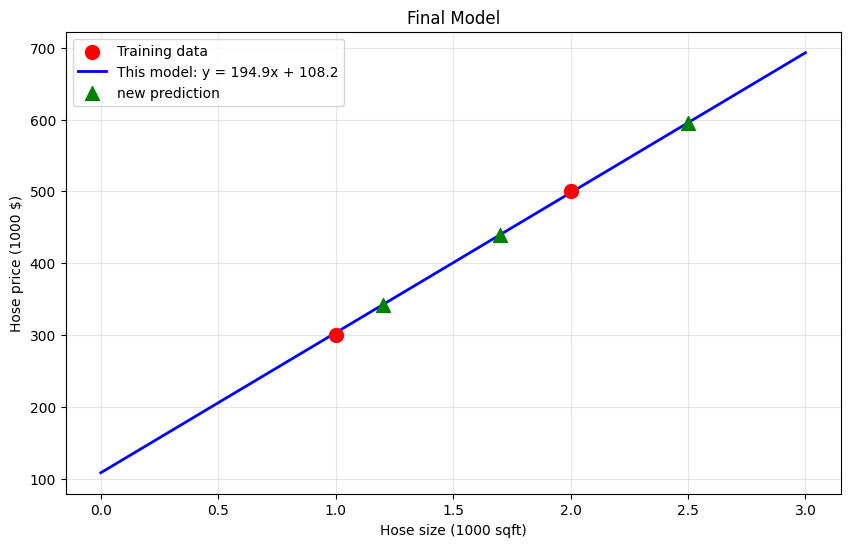


🎯 학습 완료!
최종 모델: 집가격 = 194.9 × 집크기 + 108.2


In [29]:
#최종 모델로 예측
def make_predictions(x_new, w_final, b_final):
    return w_final * x_new + b_final

#새로운 데이터
x_new = np.array([1.2,1.7,2.5])
predictions = make_predictions(x_new, w0, b0)

print("---------최종 모델 예측 결과 ---------")
for i in range(len(x_new)):
    print(f"집 크기: {x_new[i]*1000:.0f} sqft → 예상 가격: ${predictions[i]*1000:.0f}")

#전체 결과 시각화
plt.figure(figsize= (10,6))

#원본 훈련 데이터
plt.scatter(x_train, y_train, marker='o', c='r',s=100, label="Training data",zorder=3)

#최종 학습된 모델 직선
x_plot = np.linspace(0,3,100) # 0부터 3까지 100개의 점으로 나눈걸 x_plot에 저장
y_plot = make_predictions(x_plot, w0, b0)
plt.plot(x_plot, y_plot, color='blue', linewidth=2, label=f'This model: y = {w0:.1f}x + {b0:.1f}')

# 새로운 예측 점들
plt.scatter(x_new, predictions, color='green', s=100, marker='^', label='new prediction', zorder=3)

plt.xlabel('Hose size (1000 sqft)')
plt.ylabel('Hose price (1000 $)')
plt.title('Final Model')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n🎯 학습 완료!")
print(f"최종 모델: 집가격 = {w0:.1f} × 집크기 + {b0:.1f}")

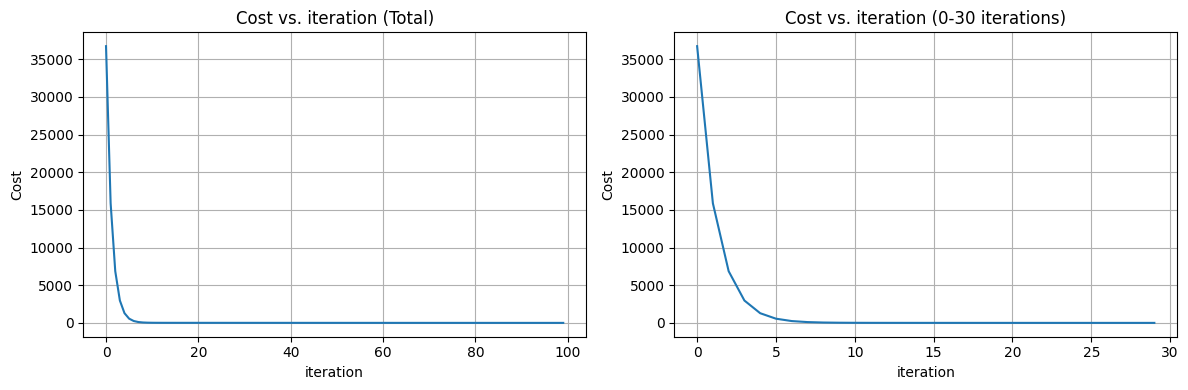

초기 비용: 36731.2
최종 비용: 3.4
비용 감소율: 100.0%


In [31]:
# 비용 변화 시각화 (두 개의 서브플롯으로 나누어)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 전체 구간 (0-100 iterations)
ax1.plot(J_vec)
ax1.set_title("Cost vs. iteration (Total)")
ax1.set_xlabel("iteration")
ax1.set_ylabel("Cost")
ax1.grid(True)

# 초기 구간만 확대 (0-30 iterations)
ax2.plot(J_vec[:30])
ax2.set_title("Cost vs. iteration (0-30 iterations)")
ax2.set_xlabel("iteration")
ax2.set_ylabel("Cost")
ax2.grid(True)

plt.tight_layout()
plt.show()

print(f"초기 비용: {J_vec[0]:.1f}")
print(f"최종 비용: {J_vec[-1]:.1f}")
print(f"비용 감소율: {(J_vec[0] - J_vec[-1]) / J_vec[0] * 100:.1f}%")


In [32]:
def plt_contour_wgrad(x, y, p_hist, ax):
    """
    등고선 플롯과 경사하강법 경로를 그리는 함수
    p_hist: 경사하강법 과정에서 저장된 (w,b) 파라미터 히스토리
    """
    # w, b 값의 범위 설정
    w_range = np.arange(50, 250, 5)
    b_range = np.arange(50, 150, 5) 
    W, B = np.meshgrid(w_range, b_range)
    
    # 각 (w,b) 조합에 대한 비용 계산
    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i,j] = compute_cost_vectorized(x, y, W[i,j], B[i,j])
    
    # 등고선 그리기
    contours = ax.contour(W, B, Z, levels=20, alpha=0.6)
    ax.clabel(contours, inline=True, fontsize=8)
    
    # 경사하강법 경로 그리기
    if len(p_hist) > 0:
        w_hist = [p[0] for p in p_hist]
        b_hist = [p[1] for p in p_hist]
        ax.plot(w_hist, b_hist, 'ro-', markersize=3, linewidth=1)
        ax.plot(w_hist[0], b_hist[0], 'go', markersize=8, label='시작점')
        ax.plot(w_hist[-1], b_hist[-1], 'ro', markersize=8, label='최종점')
    
    ax.set_xlabel('w')
    ax.set_ylabel('b')
    ax.set_title('비용 함수 등고선과 경사하강법 경로')
    ax.legend()

# 경사하강법 실행하면서 파라미터 히스토리 저장
def gradient_descent_with_history(x, y, w_init, b_init, alpha, num_iters):
    w = w_init
    b = b_init
    J_history = []
    p_hist = []  # 파라미터 히스토리 저장
    
    for i in range(num_iters):
        p_hist.append([w, b])  # 현재 파라미터 저장
        dj_dw, dj_db = compute_gradient_vectorized(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = compute_cost_vectorized(x, y, w, b)
        J_history.append(cost)
    
    return w, b, J_history, p_hist


C:\Users\SeungWoo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SeungWoo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SeungWoo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SeungWoo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\SeungWoo\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarn

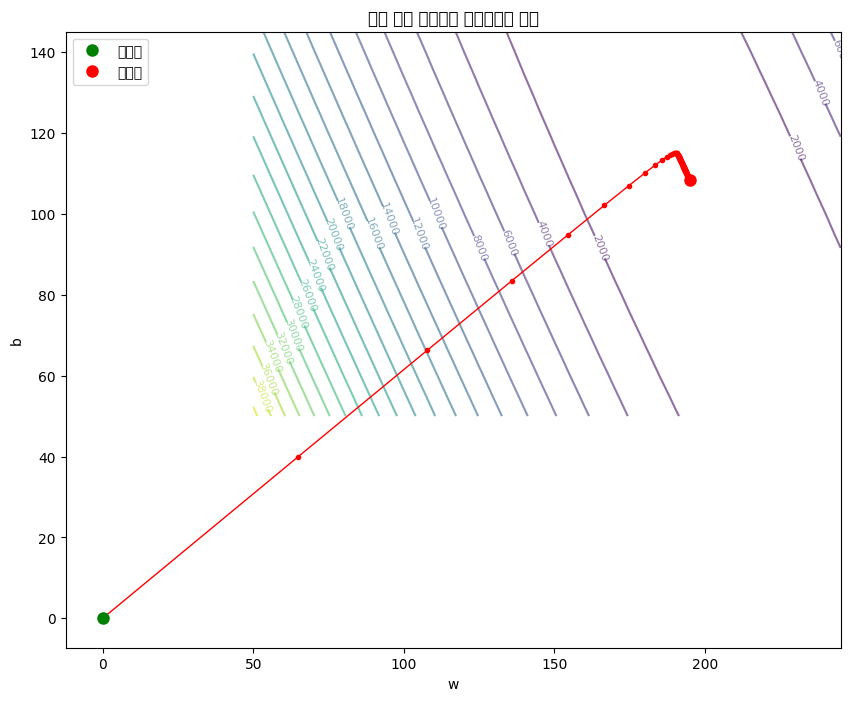

경사하강법이 거쳐간 점의 개수: 100
시작점: w=0.0, b=0.0
최종점: w=194.9, b=108.3


In [33]:
# 히스토리를 저장하면서 경사하강법 실행
w_final, b_final, J_hist, p_hist = gradient_descent_with_history(
    x_train, y_train, w_init=0, b_init=0, alpha=0.1, num_iters=100)

# 등고선 플롯 그리기
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt_contour_wgrad(x_train, y_train, p_hist, ax)
plt.show()

print(f"경사하강법이 거쳐간 점의 개수: {len(p_hist)}")
print(f"시작점: w={p_hist[0][0]:.1f}, b={p_hist[0][1]:.1f}")
print(f"최종점: w={p_hist[-1][0]:.1f}, b={p_hist[-1][1]:.1f}")
